<a href="https://colab.research.google.com/github/alinemls/datasets/blob/main/Iris_Decision_Tree_Testev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de Bibliotecas

In [665]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import randint
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, cohen_kappa_score as kappa, confusion_matrix, classification_report
from IPython.display import Image
%matplotlib inline

## Carregamento da Base

In [666]:
df = pd.read_csv('https://raw.githubusercontent.com/alinemls/datasets/main/iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [667]:
df.drop(labels=['Id'], axis=1, inplace=True, errors='ignore')

In [668]:
#df.head(5)

In [669]:
# Agrupamento pela identificação completa da planta
#df.groupby('variety').size()

##Preparação de Dados

In [670]:
idCat,Cat = pd.factorize(df["variety"])
idCat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [671]:
df['varietyCat']=idCat

In [672]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,varietyCat
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [673]:
del df["variety"]

In [674]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,varietyCat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Análise Exploratória

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   varietyCat    150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [676]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,varietyCat
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


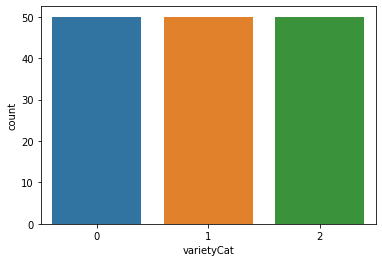

In [677]:
sns.countplot(df["varietyCat"])

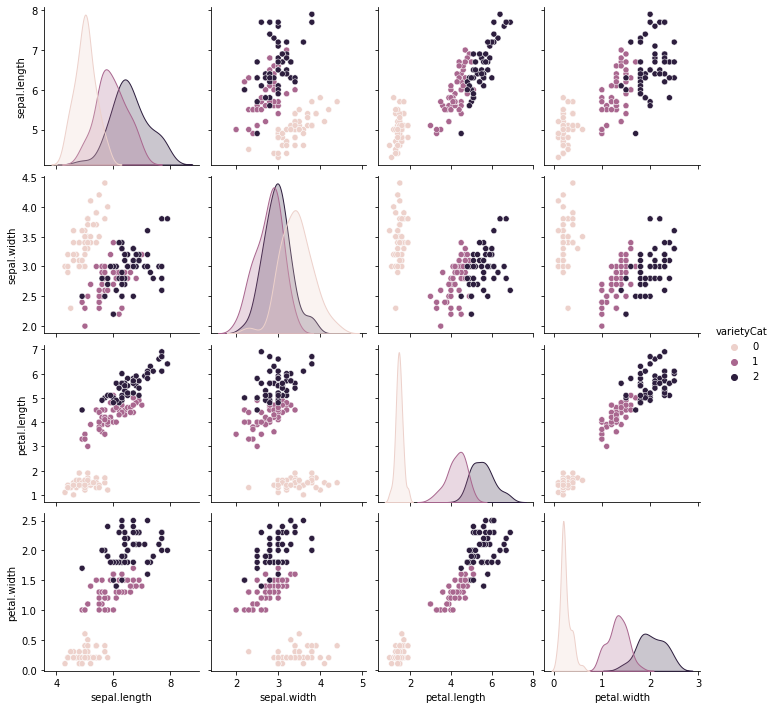

In [678]:
sns.pairplot(df,hue="varietyCat")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


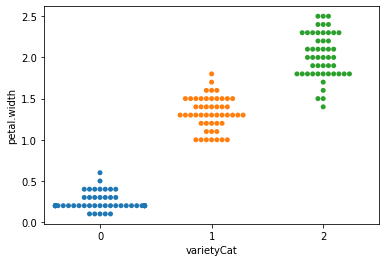

In [679]:
sns.swarmplot (x="varietyCat",y="petal.width",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


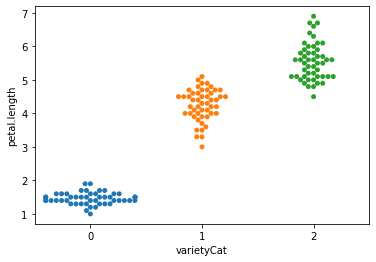

In [680]:
sns.swarmplot (x="varietyCat",y="petal.length",data=df)

##Divisão dos Dados em Treino e Teste

In [681]:
X=df.drop("varietyCat",axis=1)
y=df["varietyCat"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [682]:
X_train.shape

(120, 4)

In [683]:
y_train.shape

(120,)

### Contrução do Modelo Baseado em Árvore de Decisão

In [684]:
# definir qual dataset será usado
dataset_model = df.copy()

In [685]:
X = dataset_model.drop(columns=['variety']).values

KeyError: ignored

In [ ]:
X

In [ ]:
# Transformação do atributo categórico em numérico
le = preprocessing.LabelEncoder()
le.fit(dataset_model.variety)
y = le.transform(dataset_model['variety'].values)
y

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

In [ ]:
# Dividindo o dataset em subconjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print('X_train =>',X_train.shape)
print('X_test =>',X_test.shape)
print('Y_train =>',y_train.shape)
print('Y_test =>',y_test.shape)

In [ ]:
# Modelo com DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt = clf_dt.fit(X_train, y_train)
y_predict_train = clf_dt.predict(X_train)
y_predict_test = clf_dt.predict(X_test)

In [ ]:
X_test

In [ ]:
y_predict_all = clf_dt.predict(X)

In [ ]:
df['y'] = y_predict_all

In [ ]:
df.head(10)

In [ ]:
df.groupby('y').size()

In [ ]:
# Checando a acurácia manualmente
print("Acurácia manual: %.2f" % np.mean(y_predict_test == y_test))

In [ ]:
# Avaliação
accuracy = metrics.accuracy_score(y_test, y_predict_test)
print("DecisionTree")
print("Accuracy: %.2f" % (accuracy))
#print("Coeficiente de Kappa: %.2f" % (kappa(y_test, clf_dt.predict(X_test))) )
#print("F1 Score train: %.2f" % f1_score(y_train, y_predict_train))
#print("F1 Score test: %.2f" % f1_score(y_test, y_predict_test))

In [ ]:
# Gerar a matrix de confusão NxN
conf_mat = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(conf_mat,figsize=(12,4),cmap='copper_r')

In [ ]:
#!pip install mlxtend --upgrade

In [ ]:
# Gerar a árvore para exibição

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf_dt,
               feature_names = df.columns, 
               #class_names=['a','b'],
               class_names=df.variety,
               filled = True
               )
# fig.savefig('tree.png')


In [ ]:
!pip install graphviz

In [ ]:
import graphviz

In [ ]:
dataset_model.columns.drop('variety')

In [ ]:
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                      feature_names=dataset_model.columns.drop('variety'),  
                      class_names=df.variety,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render(filename="iris", view=True, format='png')

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_dt, feature_names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
print(r)

In [ ]:
# Feature importances

feature_importance=pd.DataFrame({
    #'rfc':clf_rf.feature_importances_,
    'dt':clf_dt.feature_importances_
},index=dataset_model.drop(columns=['variety']).columns)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(5,5))
#rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
ax.set_title("Feature importances")
ax.legend()
plt.show()
